## FineTuning Yolo v11 to Detect Muzzle dogs

In [1]:
%pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existin

## Fine-tune YOLO11 on custom dataset

## Custom Training

In [3]:
!ls /kaggle/working

runs  yolo11n.pt  yolo11s.pt


In [ ]:
from ultralytics import YOLO

model = YOLO("/kaggle/input/yolo-v11-finetuned-muzzle-dogs/pytorch/default/1/yolov11_best.pt")

results = model.train(
    data='/kaggle/input/muzzle-dogs2/data.yaml',
    epochs=30,                                
    batch=16                             
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.126 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/muzzle-dogs2/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, 

100%|██████████| 755k/755k [00:00<00:00, 26.8MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.1±5.1 MB/s, size: 53.7 KB)


train: Scanning /kaggle/input/muzzle-dogs2/train/labels... 2043 images, 39 backgrounds, 0 corrupt: 100%|██████████| 2043/2043 [00:04<00:00, 408.93it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/muzzle-dogs2/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 63.7±43.6 MB/s, size: 48.0 KB)


val: Scanning /kaggle/input/muzzle-dogs2/train/labels... 2043 images, 39 backgrounds, 0 corrupt: 100%|██████████| 2043/2043 [00:01<00:00, 1100.52it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/muzzle-dogs2/train is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.46G     0.9377     0.6894      1.367         53        640: 100%|██████████| 128/128 [00:44<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17<00:00,  3.62it/s]

                   all       2043       4572      0.761      0.748      0.778      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.68G     0.9834     0.7421      1.405         37        640: 100%|██████████| 128/128 [00:42<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17<00:00,  3.75it/s]

                   all       2043       4572      0.734      0.711      0.726       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       4.7G      1.036     0.8175      1.439         58        640: 100%|██████████| 128/128 [00:42<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.79it/s]

                   all       2043       4572      0.623      0.711      0.702      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       4.7G       1.06     0.8311      1.469         55        640: 100%|██████████| 128/128 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.80it/s]

                   all       2043       4572       0.69      0.734      0.739      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       4.7G      1.061     0.8135      1.465         41        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.78it/s]

                   all       2043       4572      0.666       0.76      0.708      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       4.7G       1.06     0.8284      1.467         46        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.85it/s]

                   all       2043       4572      0.736      0.761      0.742      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       4.7G      1.036     0.7959      1.443         54        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.89it/s]

                   all       2043       4572      0.817      0.826      0.843      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       4.7G      1.011     0.7739      1.431         40        640: 100%|██████████| 128/128 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.85it/s]

                   all       2043       4572      0.751      0.829      0.813      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       4.7G      1.023     0.7667      1.442         62        640: 100%|██████████| 128/128 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.85it/s]

                   all       2043       4572      0.853      0.817      0.833      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       4.7G      1.004     0.7592      1.425         48        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.82it/s]

                   all       2043       4572      0.877      0.839      0.867      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       4.7G     0.9662     0.7113      1.395         48        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.80it/s]

                   all       2043       4572      0.814       0.86      0.857      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       4.7G     0.9683      0.715      1.386         54        640: 100%|██████████| 128/128 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.84it/s]

                   all       2043       4572      0.795      0.862      0.799      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       4.7G     0.9584       0.71      1.383         60        640: 100%|██████████| 128/128 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.83it/s]

                   all       2043       4572        0.8      0.812      0.816      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       4.7G     0.9383     0.6974      1.374         57        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.84it/s]

                   all       2043       4572      0.812      0.847      0.866      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       4.7G     0.9467     0.6842      1.378         48        640: 100%|██████████| 128/128 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.85it/s]

                   all       2043       4572      0.828      0.775      0.846      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       4.7G     0.9434     0.6732      1.376         52        640: 100%|██████████| 128/128 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.88it/s]

                   all       2043       4572      0.769      0.812      0.883      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       4.7G     0.9214     0.6664      1.356         44        640: 100%|██████████| 128/128 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.84it/s]

                   all       2043       4572      0.912      0.857      0.907      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       4.7G     0.9133      0.641      1.349         59        640: 100%|██████████| 128/128 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.79it/s]

                   all       2043       4572      0.963      0.859      0.907      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       4.7G     0.9127     0.6407      1.346         60        640: 100%|██████████| 128/128 [00:41<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.81it/s]

                   all       2043       4572      0.928      0.903      0.943      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       4.7G     0.8769     0.6164      1.325         55        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.81it/s]

                   all       2043       4572      0.856      0.866      0.879      0.662


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       4.7G     0.7987     0.4378      1.324         21        640: 100%|██████████| 128/128 [00:42<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.85it/s]

                   all       2043       4572      0.907        0.9      0.916      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30       4.7G     0.7808     0.4117      1.318         32        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.82it/s]

                   all       2043       4572       0.94      0.903      0.954      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       4.7G     0.7534     0.4001      1.286         24        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.83it/s]

                   all       2043       4572      0.899      0.883      0.916      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       4.7G     0.7225     0.3855      1.267         28        640: 100%|██████████| 128/128 [00:41<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.77it/s]

                   all       2043       4572      0.932      0.914      0.952      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       4.7G     0.7185     0.3787      1.263         22        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.80it/s]

                   all       2043       4572      0.974      0.901      0.966      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30       4.7G     0.7104     0.3712      1.258         20        640: 100%|██████████| 128/128 [00:41<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.84it/s]

                   all       2043       4572      0.946      0.942      0.964      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       4.7G     0.6802     0.3542      1.228         20        640: 100%|██████████| 128/128 [00:41<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.84it/s]

                   all       2043       4572      0.941      0.941      0.971      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       4.7G     0.6724     0.3531      1.222         21        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.84it/s]

                   all       2043       4572      0.978       0.94      0.971      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       4.7G     0.6682     0.3469      1.227         22        640: 100%|██████████| 128/128 [00:41<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.83it/s]

                   all       2043       4572       0.98      0.939      0.971       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       4.7G     0.6469     0.3421      1.199         37        640: 100%|██████████| 128/128 [00:41<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.82it/s]

                   all       2043       4572      0.977      0.942      0.974      0.818



30 epochs completed in 0.494 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:19<00:00,  3.28it/s]


                   all       2043       4572      0.977      0.941      0.974      0.818
        Dangerous_Dogs       2001       2310      0.981      0.997      0.992      0.884
             No_muzzle         18         18      0.985      0.833      0.943      0.743
                muzzle       1953       2244      0.964      0.994      0.985      0.826


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


In [ ]:

#!yolo task=detect mode=train model=yolo11s.pt data="/kaggle/input/muzzle-dogs2/data.yaml" epochs=15 imgsz=640 plots=True

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [5]:
!ls /kaggle/working/runs/detect/train

args.yaml			 R_curve.png	      train_batch2.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2560.jpg  val_batch2_labels.jpg
P_curve.png			 train_batch2561.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch2562.jpg  weights


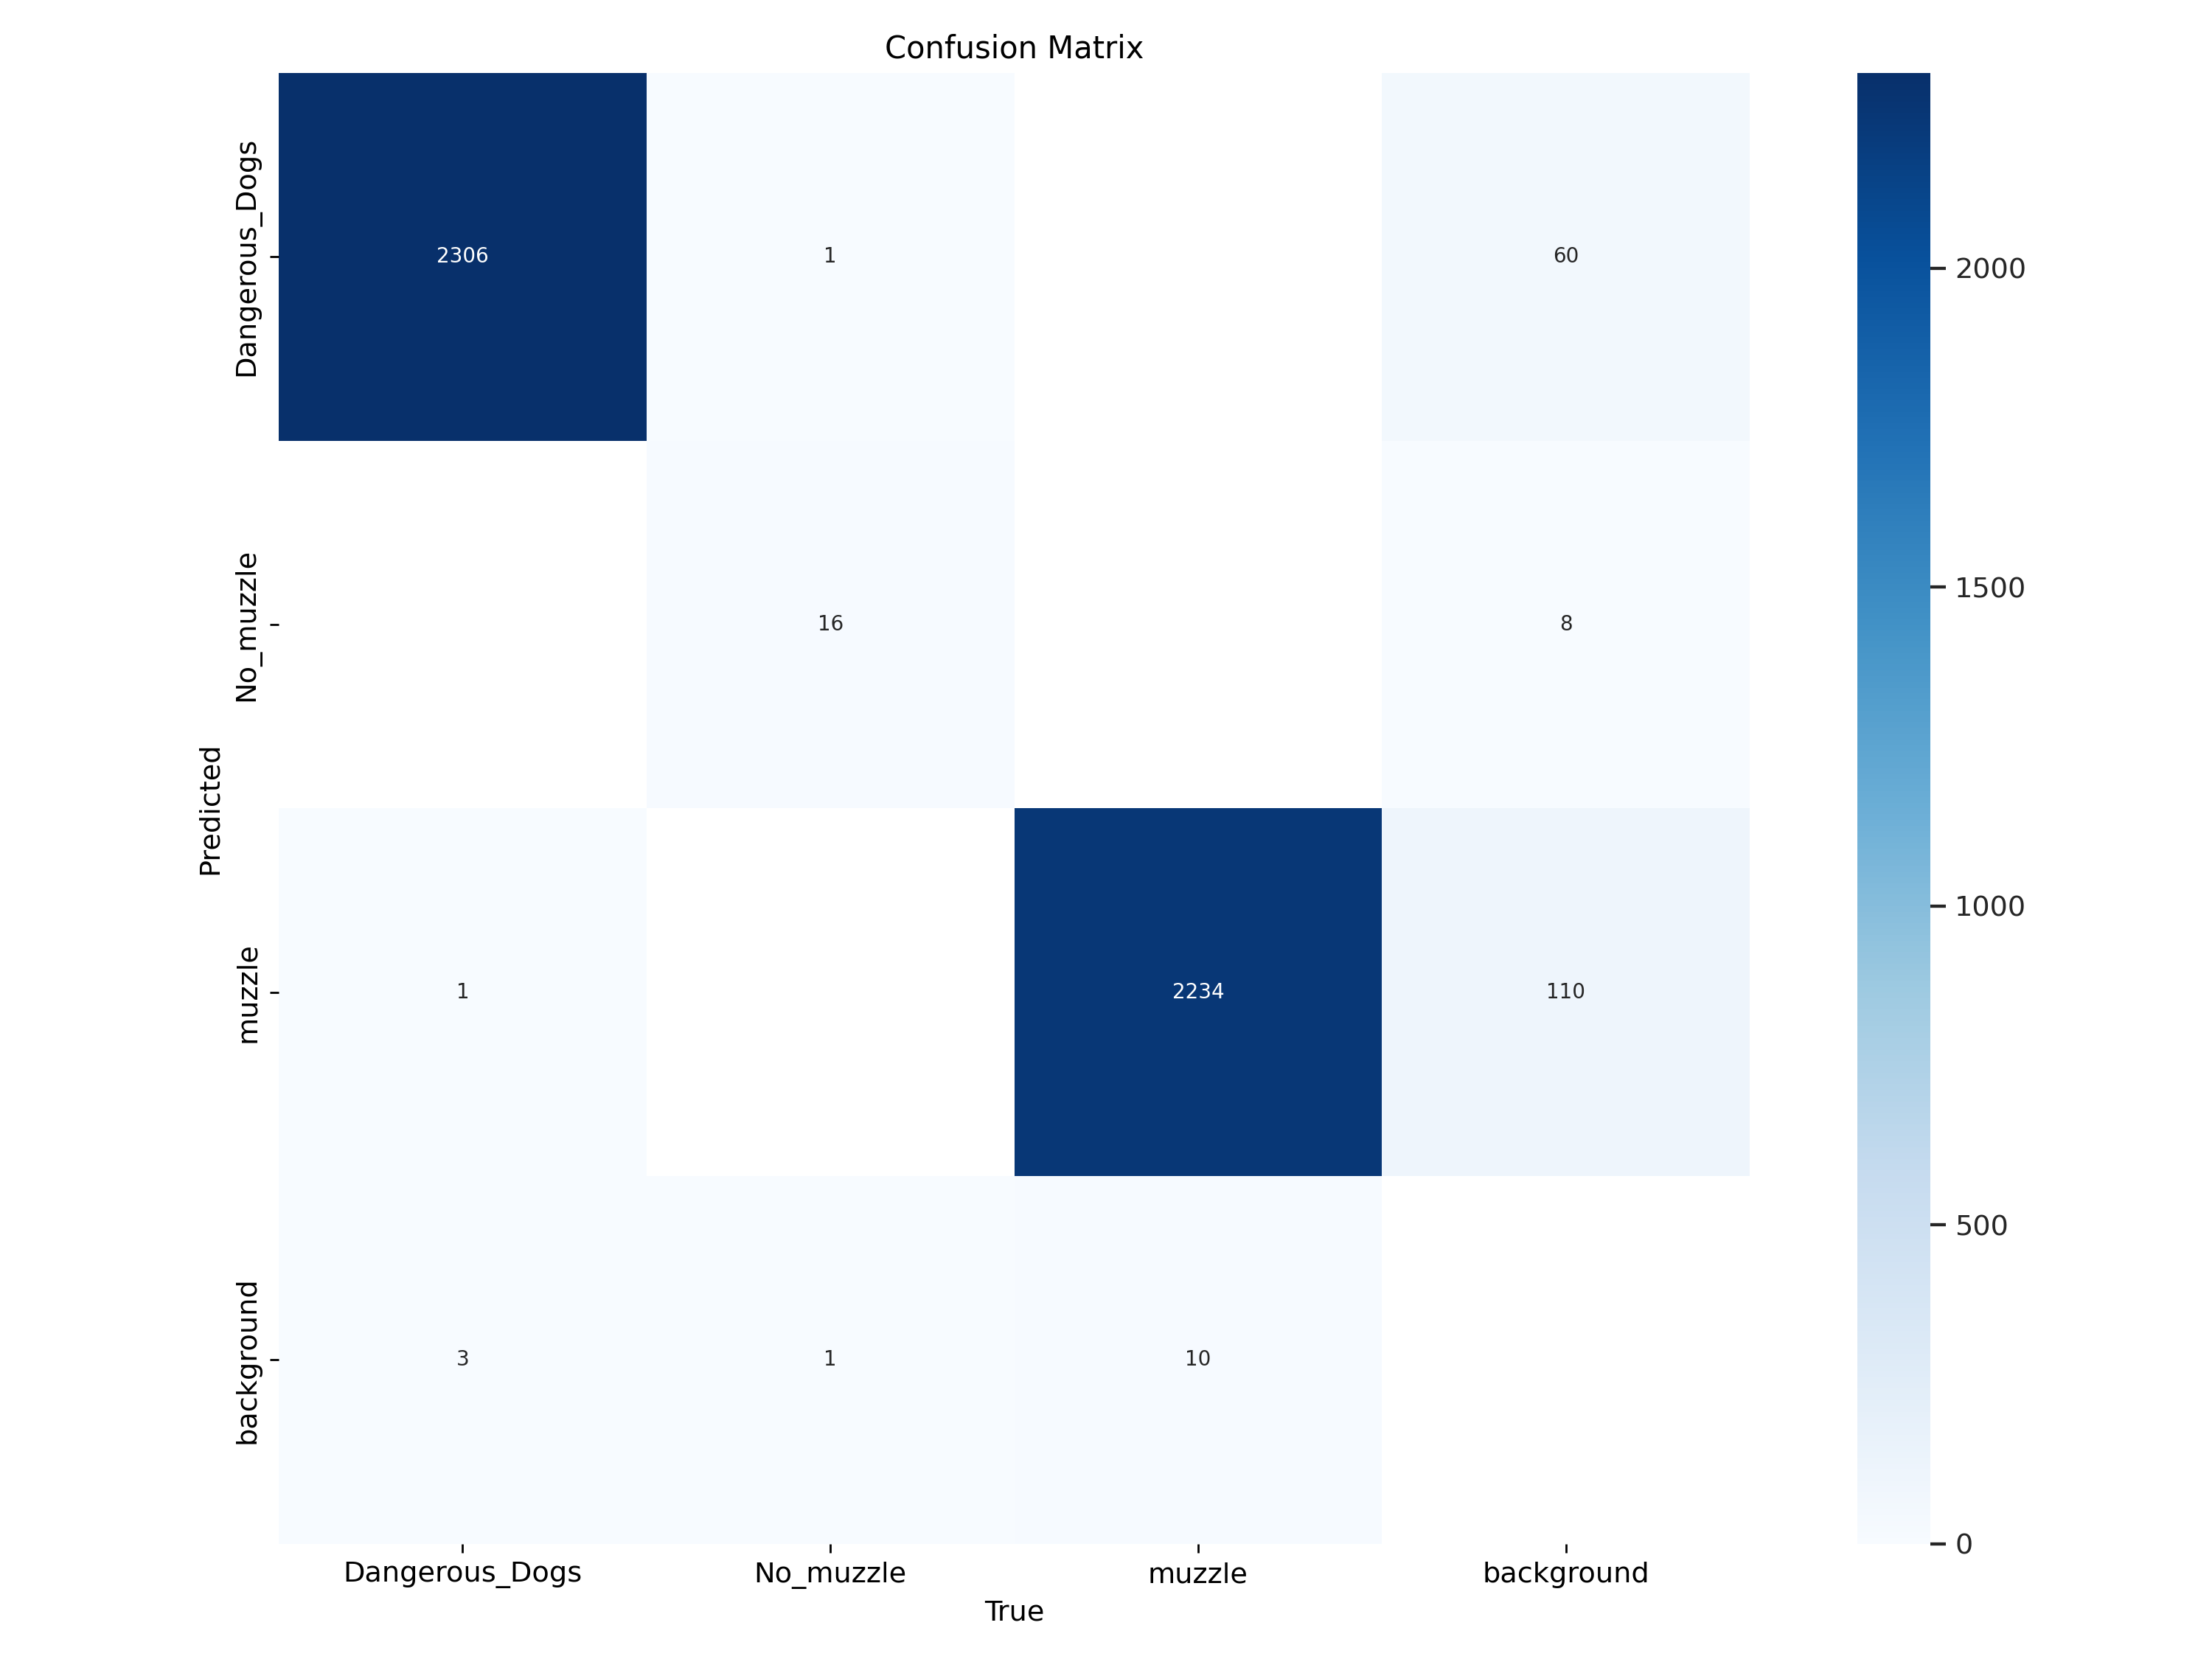

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

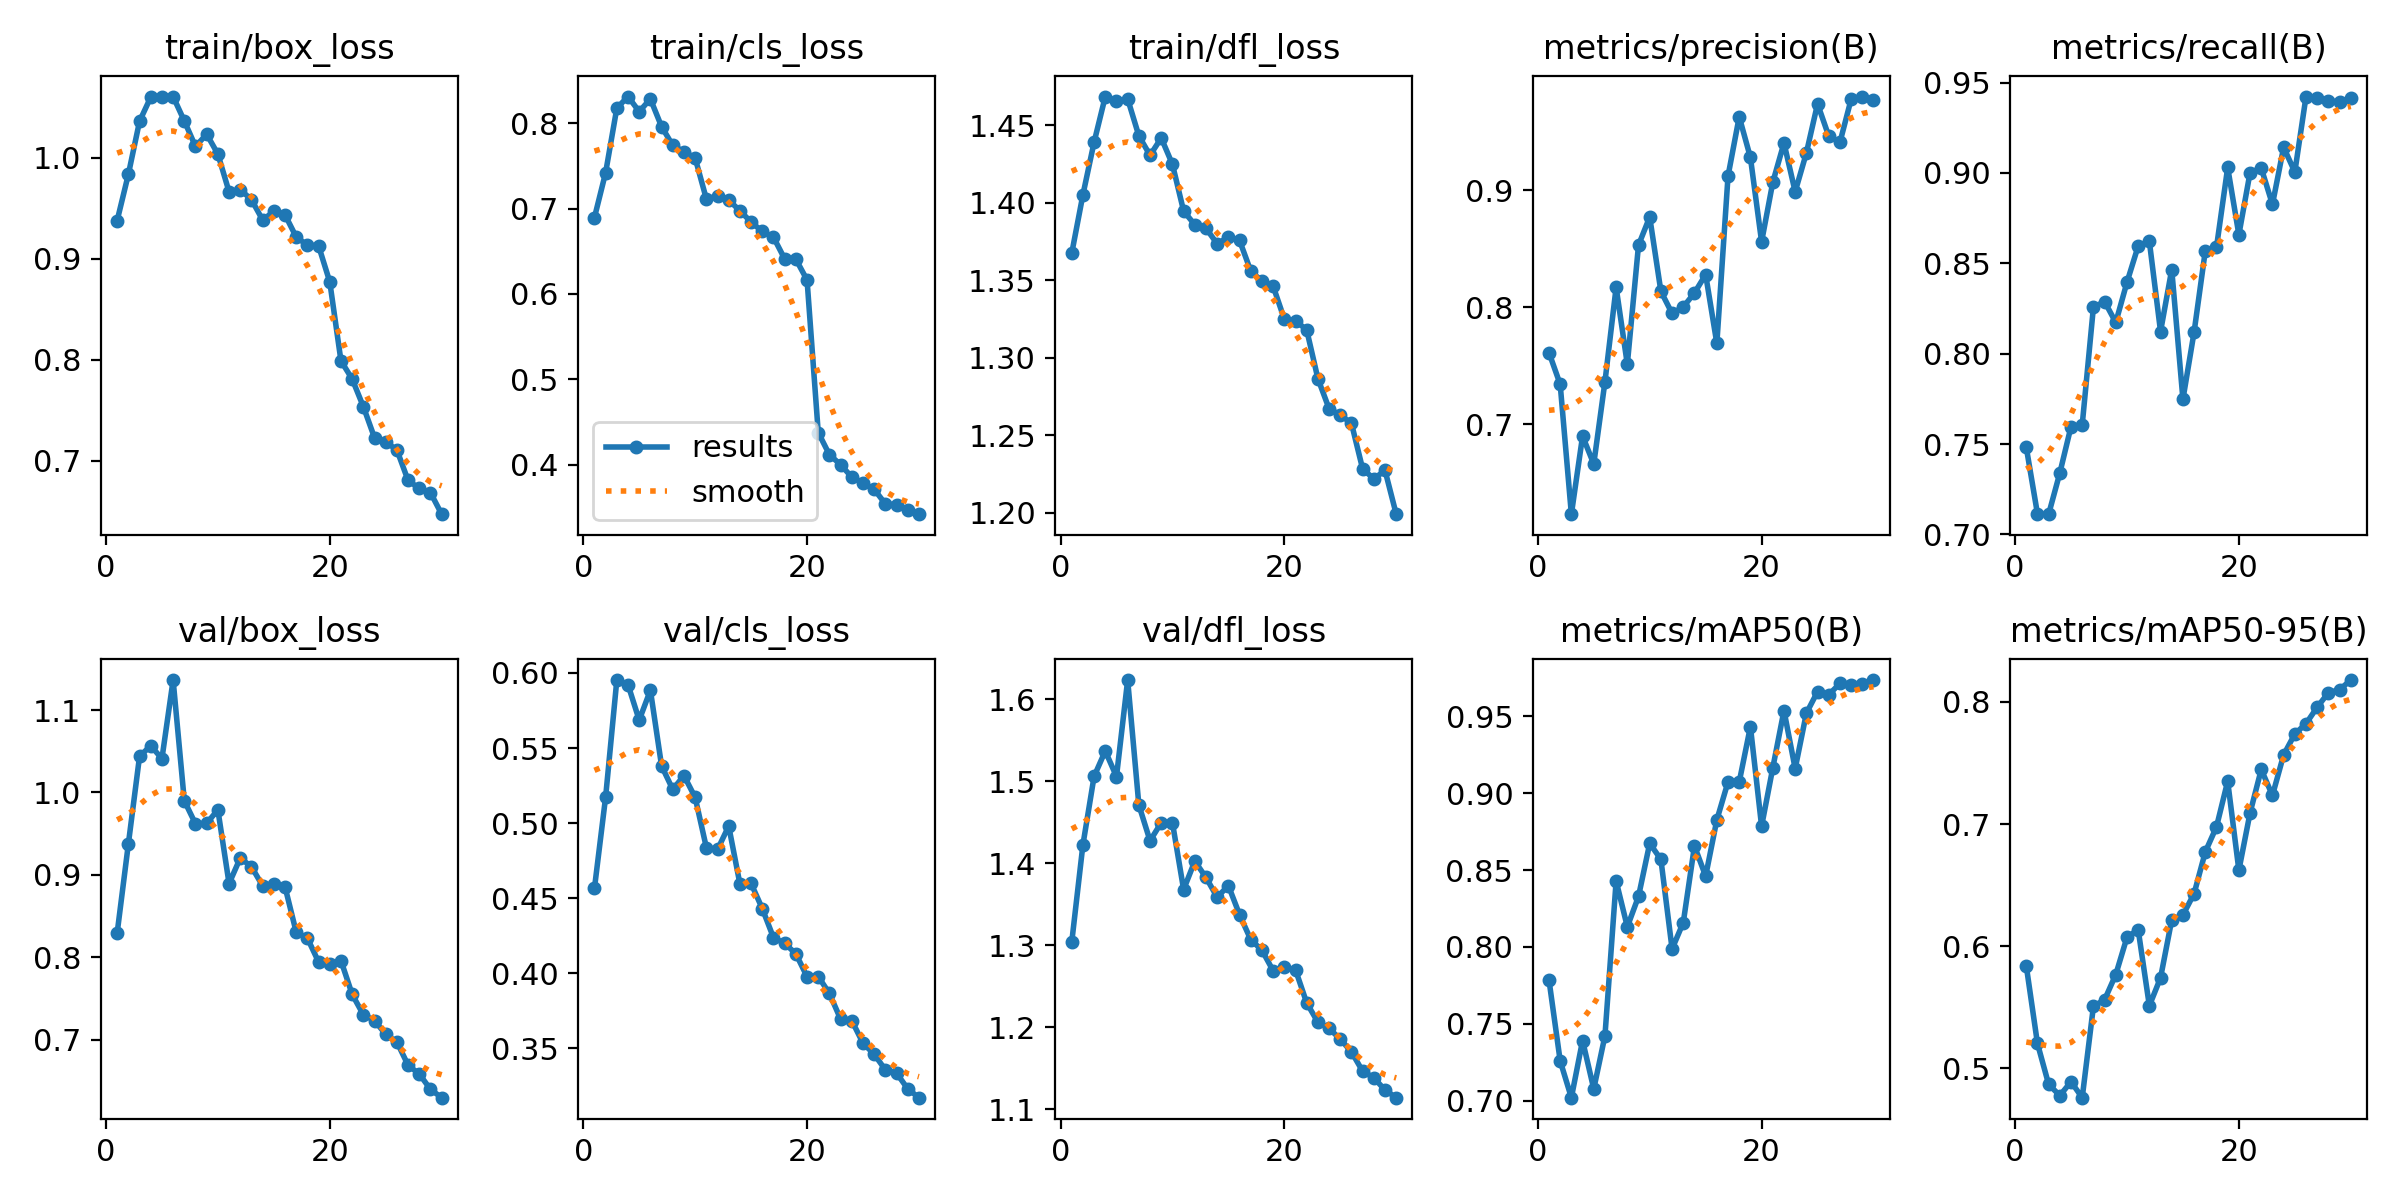

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/results.png', width=600)

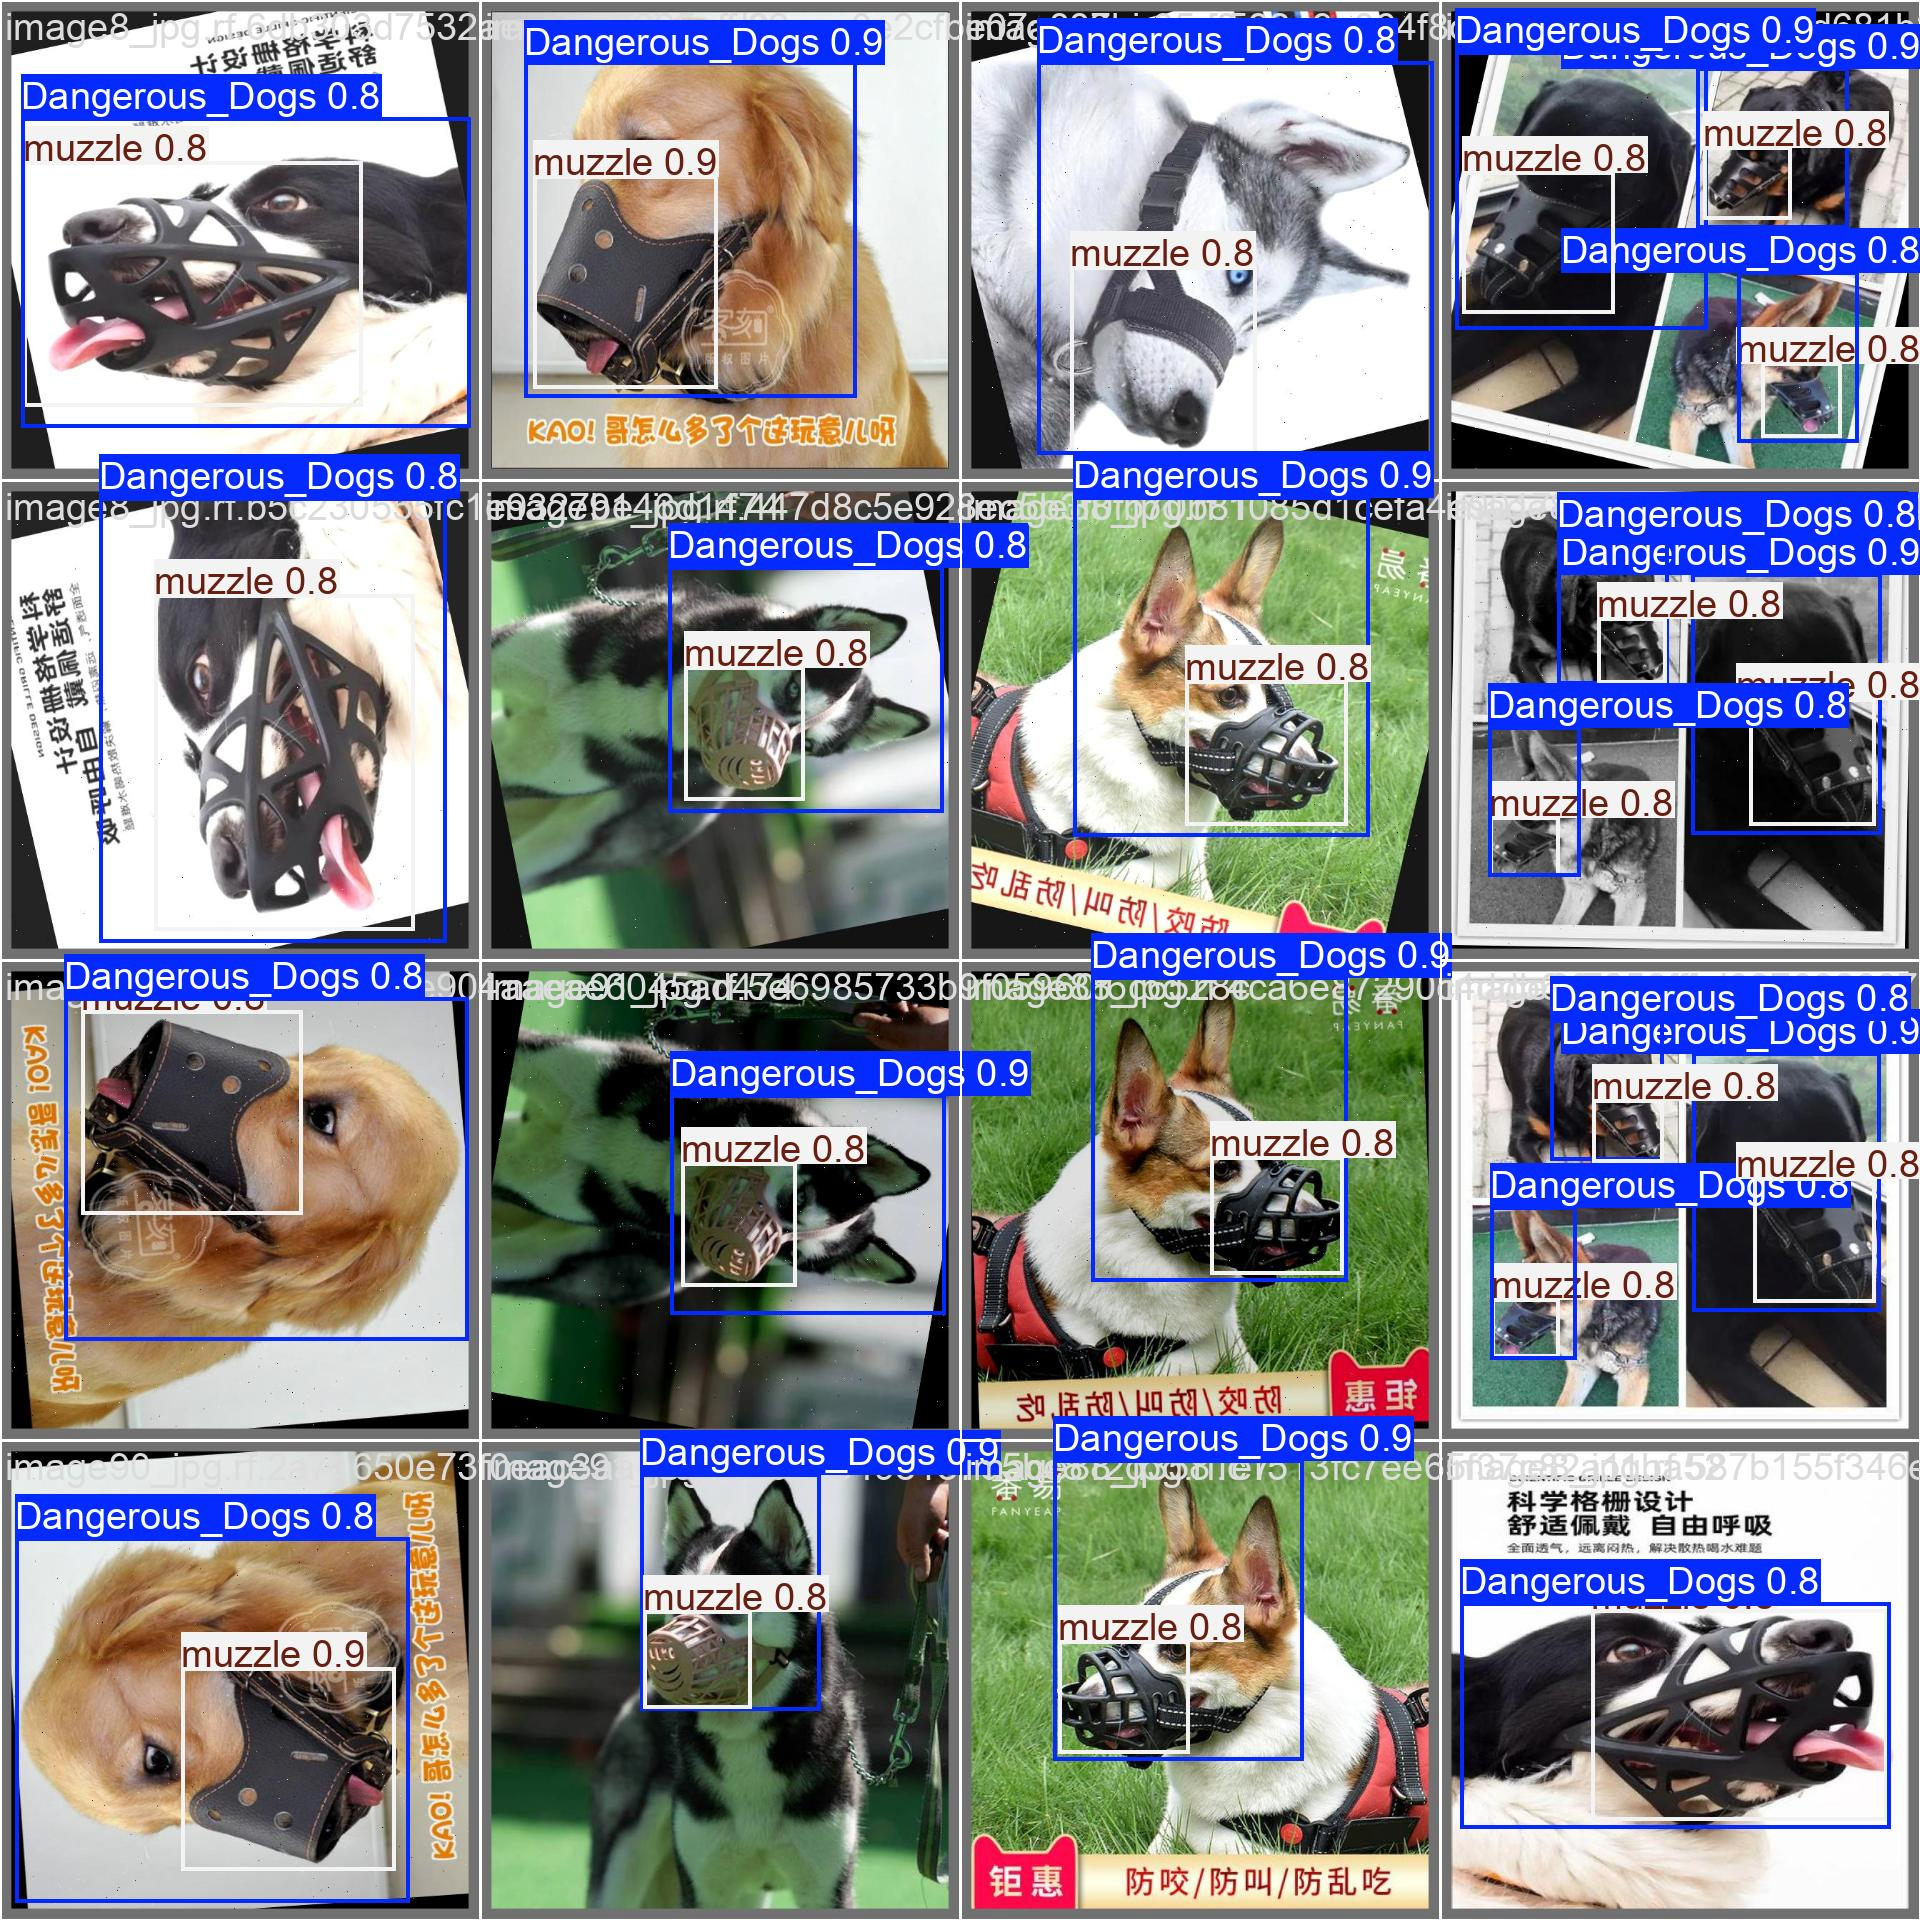

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/kaggle/working/runs/detect/train/val_batch0_pred.jpg', width=600)